In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                             roc_auc_score, f1_score, confusion_matrix, \
                             precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
diabetes_data = pd.read_csv('../data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print(f'confusion matrix :\n{confusion}')
    print(f'accuracy : {accuracy:.4f}\nprecision : {precision:.4f}')
    print(f'recall : {recall:.4f}\nf1 : {f1:.4f}\nauc : {roc_auc:.4f}')

In [5]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

In [10]:
lr_clf = LogisticRegression(max_iter=200)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [11]:
get_clf_eval(y_test, pred, pred_proba)

confusion matrix :
[[90 10]
 [21 33]]
accuracy : 0.7987
precision : 0.7674
recall : 0.6111
f1 : 0.6804
auc : 0.8072


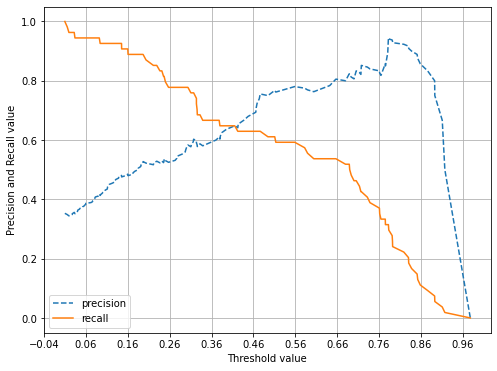

In [12]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [13]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

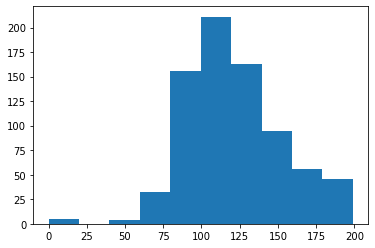

In [14]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [15]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature} 0 {zero_count}개, {100*zero_count/total_count:.2f}%')

Glucose 0 5개, 0.65%
BloodPressure 0 35개, 4.56%
SkinThickness 0 227개, 29.56%
Insulin 0 374개, 48.70%
BMI 0 11개, 1.43%


In [16]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [17]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression(max_iter=200)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [18]:
get_clf_eval(y_test, pred, pred_proba)

confusion matrix :
[[90 10]
 [21 33]]
accuracy : 0.7987
precision : 0.7674
recall : 0.6111
f1 : 0.6804
auc : 0.8433


In [19]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\nthreshold :', threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [20]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


threshold : 0.3
confusion matrix :
[[67 33]
 [11 43]]
accuracy : 0.7143
precision : 0.5658
recall : 0.7963
f1 : 0.6615
auc : 0.8433

threshold : 0.33
confusion matrix :
[[72 28]
 [12 42]]
accuracy : 0.7403
precision : 0.6000
recall : 0.7778
f1 : 0.6774
auc : 0.8433

threshold : 0.36
confusion matrix :
[[76 24]
 [15 39]]
accuracy : 0.7468
precision : 0.6190
recall : 0.7222
f1 : 0.6667
auc : 0.8433

threshold : 0.39
confusion matrix :
[[78 22]
 [16 38]]
accuracy : 0.7532
precision : 0.6333
recall : 0.7037
f1 : 0.6667
auc : 0.8433

threshold : 0.42
confusion matrix :
[[84 16]
 [18 36]]
accuracy : 0.7792
precision : 0.6923
recall : 0.6667
f1 : 0.6792
auc : 0.8433

threshold : 0.45
confusion matrix :
[[85 15]
 [18 36]]
accuracy : 0.7857
precision : 0.7059
recall : 0.6667
f1 : 0.6857
auc : 0.8433

threshold : 0.48
confusion matrix :
[[88 12]
 [19 35]]
accuracy : 0.7987
precision : 0.7447
recall : 0.6481
f1 : 0.6931
auc : 0.8433

threshold : 0.5
confusion matrix :
[[90 10]
 [21 33]]
accuracy

In [21]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

confusion matrix :
[[88 12]
 [19 35]]
accuracy : 0.7987
precision : 0.7447
recall : 0.6481
f1 : 0.6931
auc : 0.8433
